In [ ]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/caglar/Downloads/RMBR4-2_export_test.csv")
df.head()

,Trait,Axis #1,Axis #2,Axis #3,Axis #4,Axis #5,Axis #6,Axis #7,Axis #8,Axis #9,Axis #10,Axis #11,Axis #12,Axis #13,Axis #14,Time
0,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:23.660Z
1,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:25.472Z
2,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:27.348Z
3,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:29.222Z
4,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:31.117Z


In [3]:
df.describe()

,Axis #1,Axis #2,Axis #3,Axis #4,Axis #5,Axis #6,Axis #7,Axis #8,Axis #9,Axis #10,Axis #11,Axis #12,Axis #13,Axis #14
count,39672.000000,39672.000000,39672.000000,39672.000000,39672.000000,39672.000000,39672.000000,39672.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.725743,3.613374,2.710336,0.620222,0.954521,0.599427,0.870145,0.102214,NaN,NaN,NaN,NaN,NaN,NaN
std,2.162120,6.879962,5.111901,1.574897,2.100186,1.815498,2.166811,0.423075,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.312710,4.217190,4.586190,0.516190,0.800090,0.361330,0.310030,0.078480,NaN,NaN,NaN,NaN,NaN,NaN
max,23.609300,51.713230,41.855560,15.666300,20.750760,20.931420,8.108480,5.905640,NaN,NaN,NaN,NaN,NaN,NaN


# Assıgn1 

In [4]:
# Setup & Imports - Cemil Caglar Yapici - 9081058
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from pathlib import Path

# Make plots look nicer
plt.style.use("seaborn-v0_8")


## Load Training Data


In [5]:
# Loading Training Data

df = pd.read_csv("C:/Users/caglar/Downloads/RMBR4-2_export_test.csv")

# If no timestamp column exists, create one (1 Hz assumption)
if "timestamp" not in df.columns:
    df["timestamp"] = pd.date_range(start="2024-01-01", periods=len(df), freq="S")

# Convert timestamp → seconds
df["t_seconds"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()

df.head()


C:\Users\caglar\AppData\Local\Temp\ipykernel_23736\1191925471.py:7: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df["timestamp"] = pd.date_range(start="2024-01-01", periods=len(df), freq="S")


,Trait,Axis #1,Axis #2,Axis #3,Axis #4,Axis #5,Axis #6,Axis #7,Axis #8,Axis #9,Axis #10,Axis #11,Axis #12,Axis #13,Axis #14,Time,timestamp,t_seconds
0,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:23.660Z,2024-01-01 00:00:00,0.0
1,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:25.472Z,2024-01-01 00:00:01,1.0
2,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:27.348Z,2024-01-01 00:00:02,2.0
3,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:29.222Z,2024-01-01 00:00:03,3.0
4,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17T12:18:31.117Z,2024-01-01 00:00:04,4.0


## Train Linear Regression Models

In [6]:
# Part 3 - I have done "Train Linear Regression Models"

axis_cols = [c for c in df.columns if "Axis" in c or "axis" in c][:8]
models = {}
stats = {}

for ax in axis_cols:
    X = df[["t_seconds"]].values
    y = df[ax].values
    lr = LinearRegression().fit(X, y)
    models[ax] = lr
    stats[ax] = {"slope": lr.coef_[0], "intercept": lr.intercept_}

pd.DataFrame(stats).T


,slope,intercept
Axis #1,-2.349461e-07,0.730403
Axis #2,4.439602e-06,3.525312
Axis #3,-1.149120e-06,2.733130
Axis #4,7.873460e-07,0.604604
Axis #5,1.696924e-07,0.951155
Axis #6,9.592794e-07,0.580399
Axis #7,1.118605e-06,0.847957
Axis #8,1.719579e-07,0.098804


## Visualize Training Data + Regression Lines

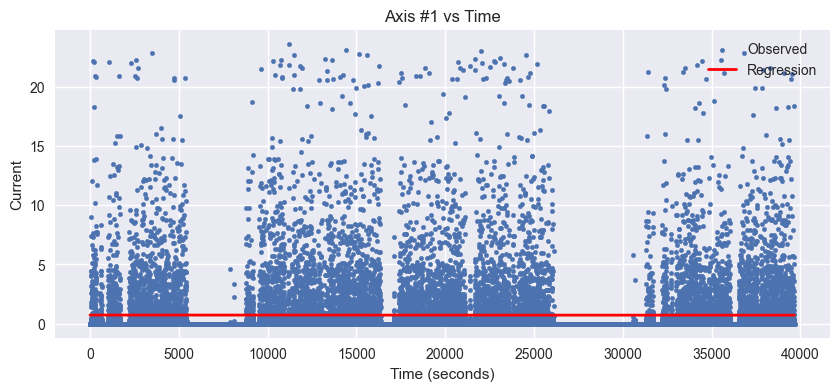

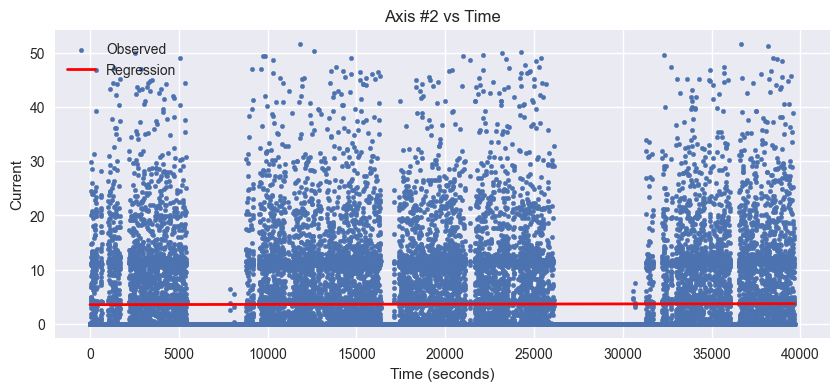

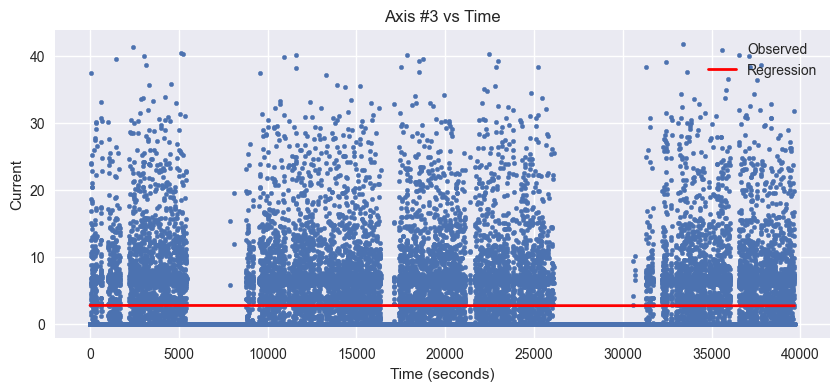

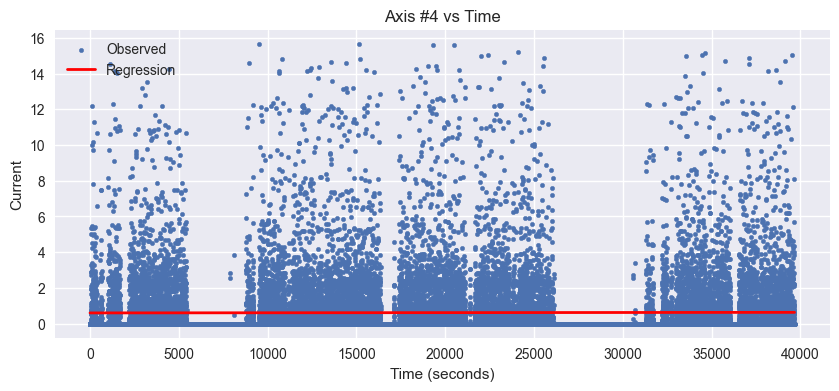

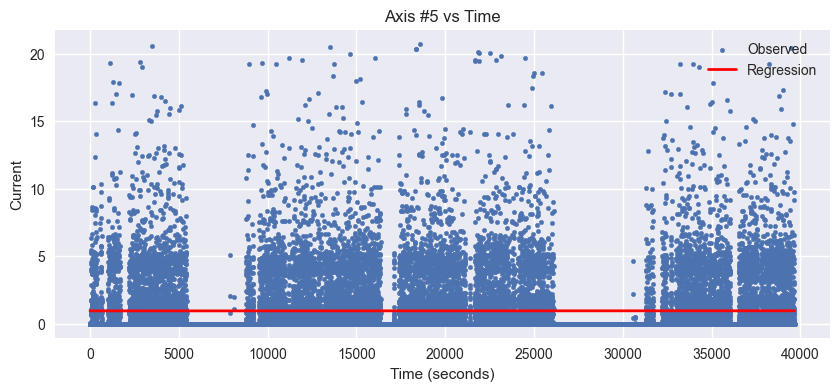

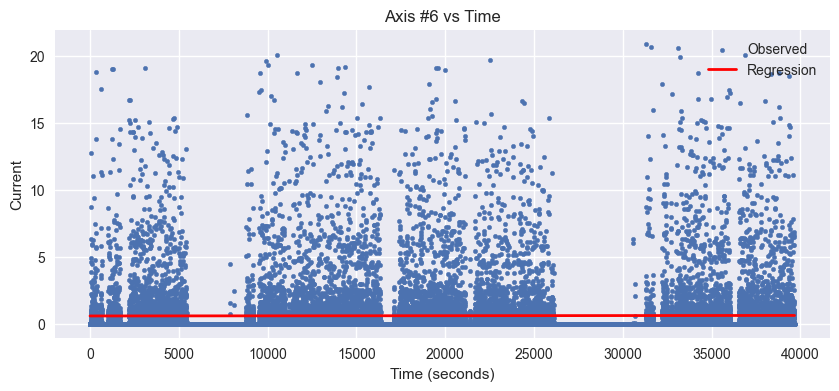

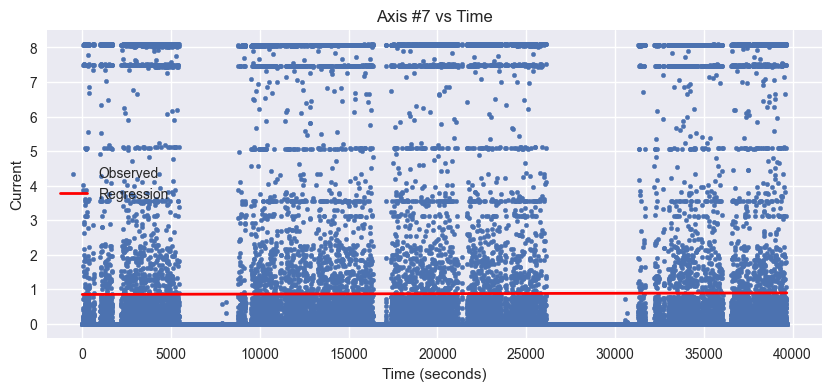

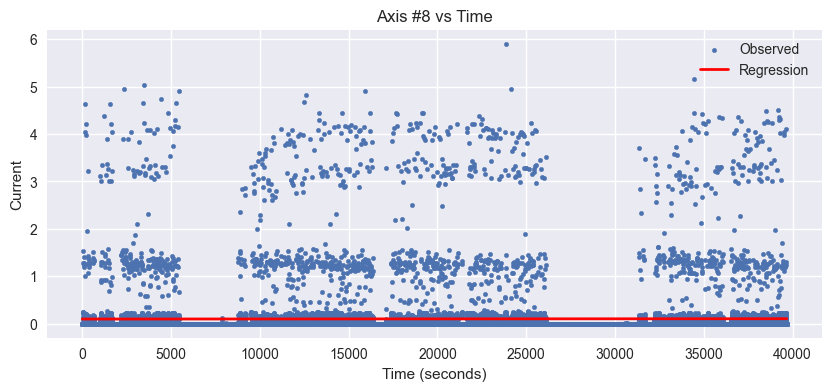

In [ ]:
# Part 4 — Visualize Training Data + Regression Lines 

for ax in axis_cols:
    X = df["t_seconds"].values.reshape(-1,1)
    y = df[ax].values
    y_pred = models[ax].predict(X)

    plt.figure(figsize=(10,4))
    plt.scatter(df["t_seconds"], y, s=10, label="Observed")
    plt.plot(df["t_seconds"], y_pred, color="red", linewidth=2, label="Regression")
    plt.title(f"{ax} vs Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Current")
    plt.legend()
    plt.show()


##### This plot shows **Axis #1 current values versus time**. The blue dots are observed sensor readings, while the red line is a fitted linear regression. Because the regression line is nearly flat at a low value, it suggests weak correlation with time, while currents fluctuate heavily around it.


##### For Axis #2: The blue points represent observed values, with strong periodic bursts reaching above 40. The regression line (red) is nearly flat, reflecting minimal trend with time. Fluctuations dominate, so anomalies should be defined by deviations above normal burst amplitudes rather than slope.

##### Axis #3 exhibits periodic clusters of high current values, often reaching 30–40. The linear regression (red line) is flat, confirming weak dependence on time. Residuals will capture significant deviations. Like Axis #2, the key lies in defining thresholds based on burst magnitudes and persistence rather than slope changes.

##### Axis #4: Observed currents for Axis #4 show repeating bursts between 5–15, with strong clustering. The regression line lies flat around a low baseline, confirming no increasing trend with time. Deviations beyond usual burst heights will be crucial for anomaly detection, highlighting periods where equipment draws abnormally high or sustained current.

##### Axis #5 shows cyclical spikes in current, reaching 15–20, with quiet intervals between bursts. The regression line remains low and flat, reflecting little long-term trend. Predictive maintenance should focus on excess bursts sustained over time, as these represent possible early warnings of abnormal load or equipment stress conditions.

##### For Axis #6, data demonstrates strong periodic bursts up to 20, alternating with low activity intervals. The regression line is flat and underestimates most activity. Anomalies should be flagged when currents persistently exceed expected burst heights, since the linear model alone cannot capture repeating cycles characteristic of this axis.

##### Axis #7 has lower overall current ranges (mostly 2–8), yet the same periodic burst structure appears. The regression line is nearly flat, underestimating most activity. Here, anomaly thresholds should be smaller than other axes, since normal operation already occurs within a narrower band of current fluctuations.

##### Axis #8 currents are the lowest among all axes, typically below 5, with occasional clusters up to 6. The regression line lies very close to zero. Even moderate deviations above this baseline will appear significant. Thus, MinC/MaxC thresholds must be carefully scaled to avoid excessive false alerts.